In [24]:
#packages that we need in classification analysis in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import tree
from sklearn import metrics
import graphviz
import pydot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc




In [25]:
#import all health factors
df1 = pd.read_excel('All in one.xlsx')
df1 = df1[1:]
# get ride of rows with missing values
df1 = df1.dropna(axis=0,how='any')
# since they reverse the sign for some of the z-score I will change it back to the original data
for index, row in df1.iterrows():
    # Food environment index
    row['Diet and Exercise'] = row['Diet and Exercise']*-1
    # Access to exercise opportunities
    row['Air Quality'] = row['Air Quality']*-1
    # ? Diabetes monitoring 
    row['Diabetic screening'] = row['Diabetic screening']*-1
    # ? Mammography screening
    row['Mammography screening'] = row['Mammography screening']*-1
    # High school graduation
    row['High school graduation'] = row['High school graduation']*-1
    # Some college (post-secondary education)
    row['Education'] = row['Education']*-1
    # Social associations
    row['Family and Social Support'] = row['Family and Social Support']*-1
    #
    row['Income'] = row['Income']*-1
#df1


In [26]:
#import overall health outcomes
df3 = pd.read_excel('outcome&factor.xlsx')
df3 = df3.dropna(axis=0,how='any')
df3 = df3[1:]
#df3

In [27]:
#Add classes to health outcomes based on z-score
def class1(df3):
    if df3['Health Outcomes'] < 0:
        return '<0'
    else:
        return '>=0'

In [28]:
df3['class1'] = df3.apply(lambda df3: class1(df3), axis=1)

In [29]:
df3[1:10]

,,,Health Outcomes,Health Factors,class1
01003,Alabama,Baldwin,-1.22533,-0.717234,<0
01005,Alabama,Barbour,-0.0920883,0.169886,<0
01007,Alabama,Bibb,0.590651,0.230422,>=0
01009,Alabama,Blount,-0.824396,-0.373055,<0
01011,Alabama,Bullock,1.98729,0.751927,>=0
01013,Alabama,Butler,0.359224,0.610626,>=0
01015,Alabama,Calhoun,0.210546,-0.0934198,>=0
01017,Alabama,Chambers,0.528246,0.16481,>=0
01019,Alabama,Cherokee,0.335478,-0.0801066,>=0


In [30]:
df3.iloc[0:10,2:]

,,,class1
01001,Alabama,Autauga,<0
01003,Alabama,Baldwin,<0
01005,Alabama,Barbour,<0
01007,Alabama,Bibb,>=0
01009,Alabama,Blount,<0
01011,Alabama,Bullock,>=0
01013,Alabama,Butler,>=0
01015,Alabama,Calhoun,>=0
01017,Alabama,Chambers,>=0
01019,Alabama,Cherokee,>=0


In [31]:
#transform health factors and outcomes into lists
# factors
list1 = df1.iloc[:,3:16].values.tolist()
# ourcomes
list2 = df3.iloc[:,2:].values.tolist()
#divide the first 2000 data into a traning set and the rest 1017 into a testing set
train_factor = list1[0:2000]
train_outcome = list2[0:2000]
test_factor = list1[2000:3017]
test_outcome = list2[2000:3017]



In [32]:
#build a decision tree using gini index
clf = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=100,
            min_samples_split=200,)
clf = clf.fit(train_factor,train_outcome)
#calculate the mean accuracy of the decision tree
clf.score(test_factor,test_outcome,sample_weight = None)

0.89282202556538837

In [33]:
#come up with 13 z-scores of attributes to predict health outcome
#using a decision tree with Gini index
list3 = [-0.05,0.78,0.22,0.34,-0.55,-0.82,-0.03,0.64,0.78,0.62,-0.79,-0.66,0.03]
clf.predict(list3)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['<0'], 
      dtype='<U3')

In [34]:
#define classes(health outcomes) and attributes(health factors)
attribute = ['Smoking', 'Diet and Exercise',
       'Alcohol Use', 'Unsafe Sex', 'Access to Care', 'Quality of Care',
       'Education', 'Employment', 'Income', 'Family and Social Support',
       'Community Safety', 'Air Quality', 'Built Environment']
classs = ['<0','>=0']

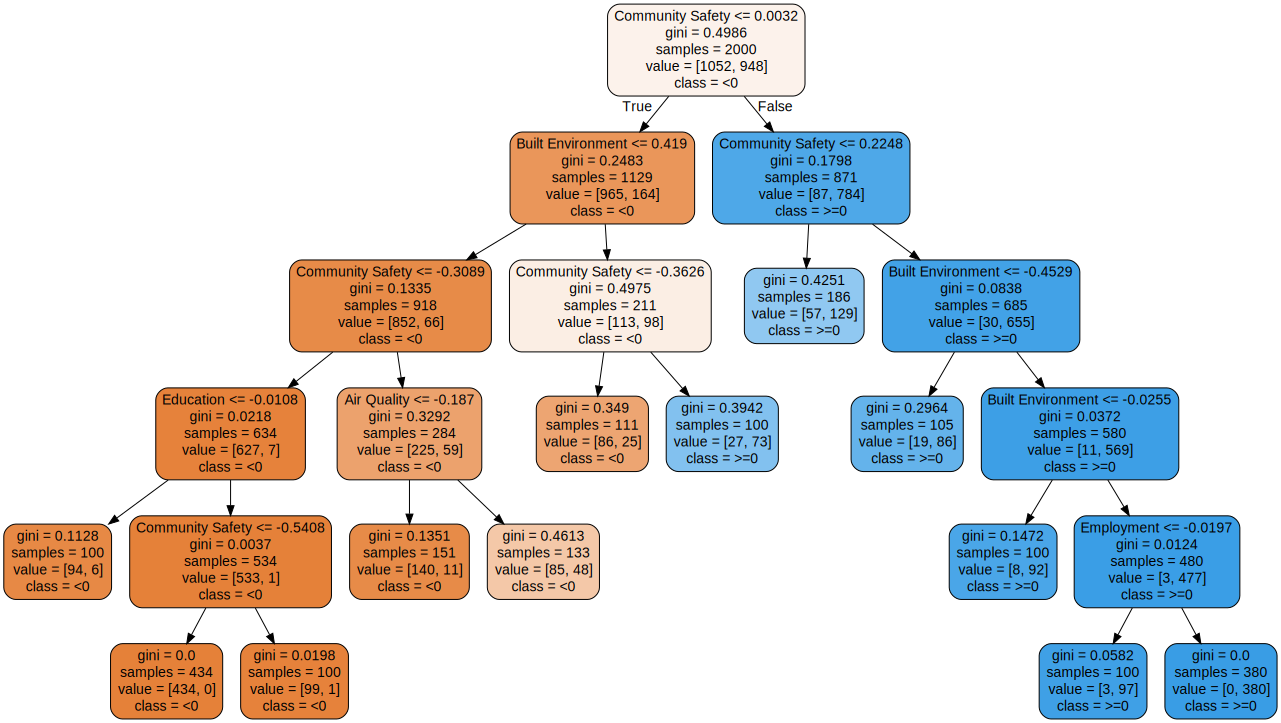

In [35]:
#show the decision tree
dot_data = tree.export_graphviz(clf,out_file=None)
graph = graphviz.Source(dot_data)
graph.render('healthoutcome_gini')
dot_data = tree.export_graphviz(clf,out_file=None, 
                                feature_names = attribute,class_names = classs,
                                filled = True, rounded = True, special_characters = False)
graph = graphviz.Source(dot_data)
graph


In [36]:
#build a decision tree based on information gain 
clf2 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=100,
            min_samples_split=200,)
clf2 = clf2.fit(train_factor,train_outcome)
clf2.score(test_factor,test_outcome,sample_weight = None)

0.89282202556538837

In [37]:
#use the same list to predict health outcomes with a decision tree
#with entropy
clf2.predict(list3)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['<0'], 
      dtype='<U3')

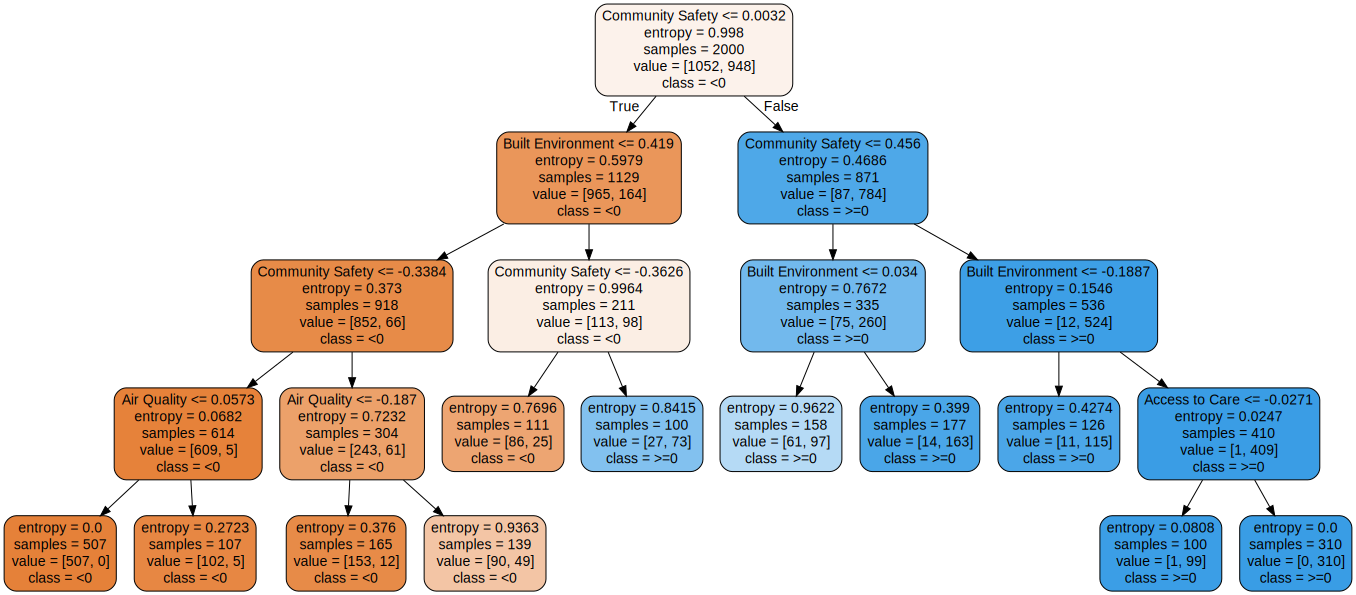

In [38]:
#show the decision tree
dot_data2 = tree.export_graphviz(clf2,out_file=None)
graph2 = graphviz.Source(dot_data2)
graph2.render('healthoutcome_entropy')
dot_data2 = tree.export_graphviz(clf2,out_file=None, 
                                feature_names = attribute,class_names = classs,
                                filled = True, rounded = True, special_characters = False)
graph2 = graphviz.Source(dot_data2)
graph2


In [39]:
y_score = clf2.fit(train_factor,train_outcome).predict(test_factor)
#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
y = label_binarize(list2,classes = classs)

In [40]:
y

array([[0],
       [0],
       [0],
       ..., 
       [1],
       [0],
       [1]])

In [41]:
a = []
b = y.tolist()
for i in b:
    for j in i:
        a.append(j)
a = np.asarray(a)
a

array([0, 0, 0, ..., 1, 0, 1])

In [42]:
n_classes = 1

X_train, X_test, y_train, y_test = train_test_split(list1, a, test_size=.5, random_state=0)

#classifier = DecisionTreeClassifier()

y_score = clf2.fit(X_train, y_train).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test.flatten(), y_test.flatten())
roc_auc_micro = auc(fpr_micro, tpr_micro)

#ROC curve for a specific class here for the class 2
roc_auc

0.88133208420978204

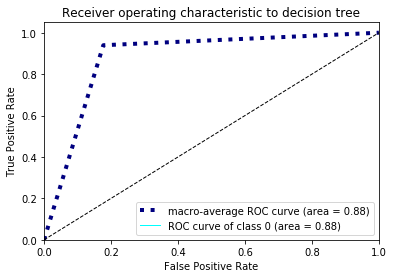

In [43]:
# plot
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr, tpr)

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot all ROC curves
plt.figure()
'''
plt.plot(fpr_micro, tpr_micro,
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_micro),
         color='deeppink', linestyle=':', linewidth=4)
'''
plt.plot(fpr_macro, tpr_macro,
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_macro),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             .format(i, roc_auc))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to decision tree')
plt.legend(loc="lower right")
plt.show()